Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [4]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [5]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [6]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [7]:
from numpy import linalg
# Vaš kôd ovdje
w = linalg.inv(fi.T.dot(fi)).dot(fi.T).dot(y)
w_pinv = linalg.pinv(fi).dot(y)
print(w)
print(w_pinv)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

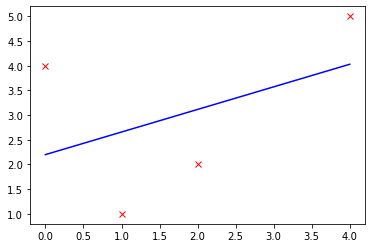

In [8]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

h = w.dot(fi.T)
plt.plot(X,y,'rx')
plt.plot(X,h, 'b')

In [9]:
residual = fi.dot(w) - y
E = 1/2 * residual.T.dot(residual)
print(E)

4.085714285714285


In [10]:
E2 = mean_squared_error(y,h)
print(E2)

2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [11]:
# Vaš kôd ovdje
#fi_inverse = linalg.inv(fi)
#fi matrica nije kvadratna pa nema inverz; 2 znacajke i 4 ulazna primjera



### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [12]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

linear = LinearRegression().fit(X,y)
print(linear.intercept_)
print(linear.coef_)

y2 = linear.predict(X)
print (mean_squared_error(y,y2))

2.2
[0.45714286]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [13]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return map(lambda x : f(x) + (normal(0, noise) if noise > 0 else 0) , X) 

In [14]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [15]:
def f(x): return  5 + x - 2*x**2 - 5*x**3
Xp = make_instances (-5,5,50)
Yp = list(make_labels(Xp, f, 200))


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

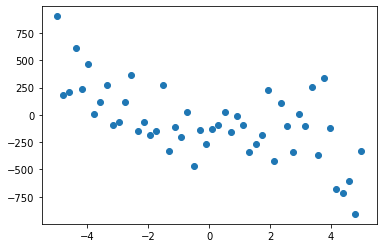

In [16]:
plt.scatter(Xp, Yp)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

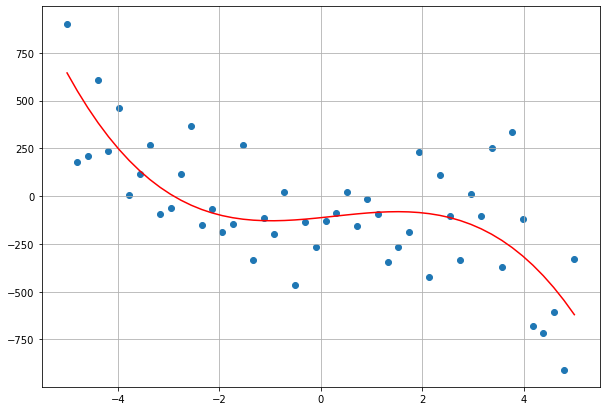

In [17]:
poly = PolynomialFeatures(3)
designX = poly.fit_transform(Xp)
wp = linalg.pinv(designX).dot(Yp)
hX = designX.dot(wp)


plt.figure(figsize=[10,7])
plt.grid()
plt.scatter(Xp, Yp)
plt.plot (Xp, hX, 'r')
plt.show()




In [18]:
Ep = mean_squared_error(Yp,hX)
print (f"Pogreška učenja: {Ep}")

Pogreška učenja: 50887.45731061863


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška učenja za d = 1 : 67561.8350335364
Pogreška učenja za d = 3 : 50887.45731061863
Pogreška učenja za d = 5 : 48913.321835501796
Pogreška učenja za d = 10 : 36633.27372829858
Pogreška učenja za d = 20 : 29044.47694742863


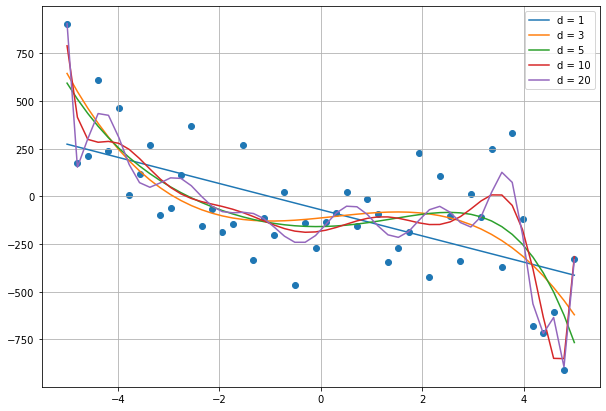

In [19]:
plt.figure(figsize=[10,7])
plt.scatter(Xp, Yp)
plt.grid()

for i in [1, 3, 5, 10, 20] :
    poly = PolynomialFeatures(i)
    designMatrix = poly.fit_transform(Xp)
    w1 = linalg.pinv(designMatrix).dot(Yp)
    h3 = designMatrix.dot(w1)
    E3 = mean_squared_error(Yp,h3)
    
    plt.plot (Xp, h3, label="d = "+str(i))
    
    print(f"Pogreška učenja za d = {i} : {E3}")
    
plt.legend(loc="best")  
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

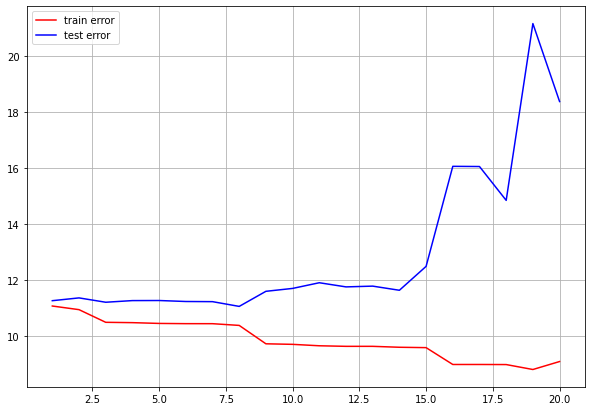

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xp, Yp, test_size=0.5)

plt.figure(figsize=[10,7])
plt.grid()

train_error = []
test_error = []

for i in range(1, 21) :
    poly = PolynomialFeatures(i)
    designMatrix_train = poly.fit_transform(X_train)
    w = linalg.pinv(designMatrix_train).dot(y_train)
    h_train = designMatrix_train.dot(w)
    train_error.append(mean_squared_error(y_train,h_train)) #pogreška učenja 
    
    designMatrix_test = poly.fit_transform(X_test)
    h_test = designMatrix_test.dot(w) 
    test_error.append(mean_squared_error(y_test,h_test))  #ispitna pogreška
    
 

plt.plot(range(1,21), log(train_error), 'r' , label="train error")
plt.plot(range(1,21), log(test_error), 'b' ,label="test error")  
    
plt.legend(loc="best")  



### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

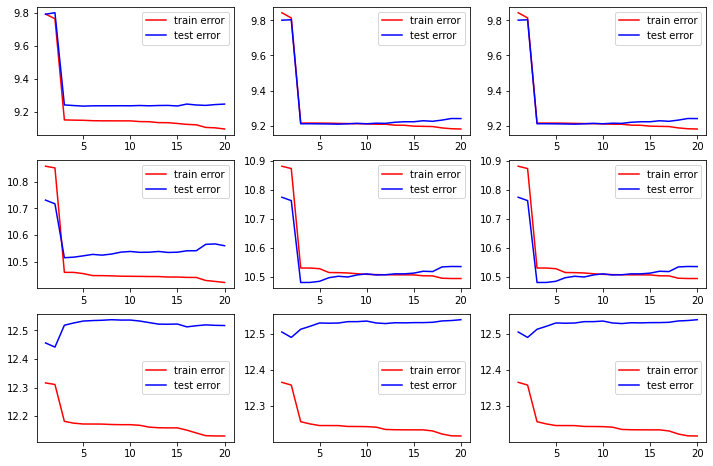

In [21]:
Xc = make_instances(-5,5,1000)
Xc_train, Xc_test = train_test_split(Xc, test_size=0.5)

sigma = [100, 200, 500]

j = 1

plt.figure(figsize=[12,8])
plt.tight_layout()

for s in sigma :

    yc_train = list(make_labels(Xc_train, f, s))
    yc_test = list(make_labels(Xc_test, f, s))
    
    for n in [333, 666, 1000] :
        x_subset_train = Xc_train[0:n]
        x_subset_test = Xc_test[0:n]
        y_subset_train = yc_train[0:n]
        y_subset_test = yc_test[0:n]
        
        train_error = []
        test_error = []

        for i in range(1, 21) :
            poly = PolynomialFeatures(i)
            designMatrix_train = poly.fit_transform(x_subset_train)
            w = linalg.pinv(designMatrix_train).dot(y_subset_train)
            h_train = designMatrix_train.dot(w)
            train_error.append(mean_squared_error(y_subset_train,h_train)) #pogreška učenja 

            designMatrix_test = poly.fit_transform(x_subset_test)
            h_test = designMatrix_test.dot(w) 
            test_error.append(mean_squared_error(y_subset_test,h_test))  #ispitna pogreška


        plt.subplot(3,3,j)
        j+=1
        plt.plot(range(1,21), log(train_error), 'r' , label="train error")
        plt.plot(range(1,21), log(test_error), 'b' ,label="test error")  
        plt.legend(loc="best")  

        
        
        
        
    



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [22]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)
I = eye(4,4)
I[0][0] = 0

for l in [0, 1, 10] :
        w = linalg.inv(phi.T.dot(phi)+ l*I).dot(phi.T).dot(y)
        print(f"lambda = {l} : {w}")
    

lambda = 0 : [ 4.         -5.91666667  3.375      -0.45833333]
lambda = 1 : [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda = 10 : [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [23]:
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)

for alpha in [0, 1, 10]:
    r = Ridge(alpha)
    r.fit(phi , y)
    print(r.intercept_ ,r.coef_[1] , r.coef_[2] , r.coef_[3])
    
    
    
    

4.000000000000025 -5.916666666666765 3.375000000000053 -0.4583333333333405
3.0569614512471652 -0.6907936507936512 -0.2831746031746025 0.14458049886621302
2.4944418431229733 -0.1589729487341474 -0.1342306653684832 0.08156009919705873


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

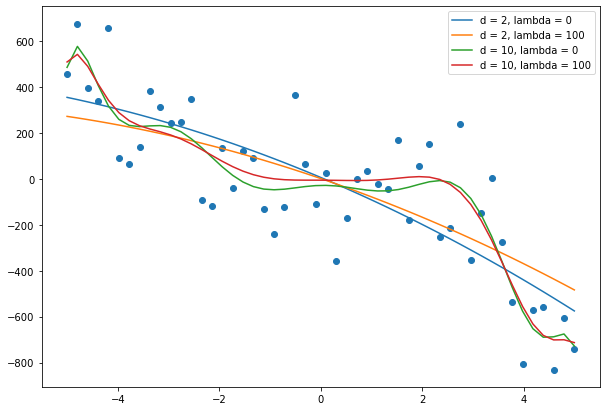

In [24]:
Xr = make_instances (-5,5,50)
Yr = list(make_labels(Xp, f, 200))
plt.figure(figsize=[10,7])
plt.scatter(Xr, Yr)

for d in [2, 10]:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(Xr)
    I = eye(phi.shape[1])
        
    for l in [0, 100] :
        w = linalg.inv(phi.T.dot(phi)+ l*I).dot(phi.T).dot(Yr)
        h = phi.dot(w)
        plt.plot (Xr, h, label="d = "+ str(d)+ ", lambda = "+str(l))
        
plt.legend(loc="best")      


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


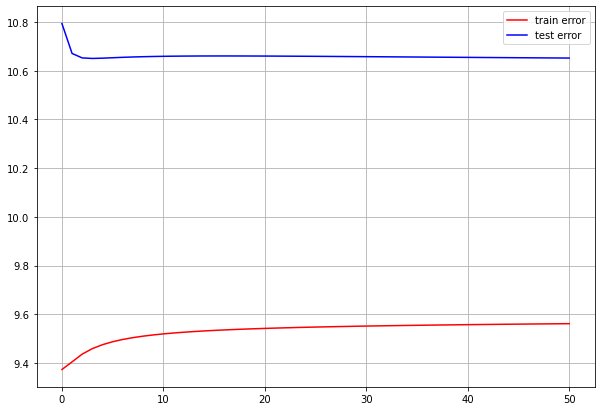

In [25]:
plt.figure(figsize=[10,7])
plt.grid()

Xr = make_instances (-5,5,50)
Yr = list(make_labels(Xp, f, 200))
X_train, X_test, y_train, y_test = train_test_split(Xr, Yr, test_size=0.5)
poly = PolynomialFeatures(10)
designMatrix_train = poly.fit_transform(X_train)
designMatrix_test = poly.fit_transform(X_test)
I = eye(designMatrix_train.shape[1])
I[0][0] = 0
train_error = []
test_error = []

for l in range(0, 51) :
   
    w = linalg.inv(designMatrix_train.T.dot(designMatrix_train)+ l*I).dot(designMatrix_train.T).dot(y_train)
    h_train = designMatrix_train.dot(w) 
    train_error.append(log(mean_squared_error(y_train,h_train))) #pogreška učenja 
    
    h_test = designMatrix_test.dot(w) 
    test_error.append(log(mean_squared_error(y_test,h_test)))  #ispitna pogreška
    
 

plt.plot(range(0,51), train_error, 'r' , label="train error")
plt.plot(range(0,51), test_error, 'b' ,label="test error")  
    
plt.legend(loc="best")




### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [26]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

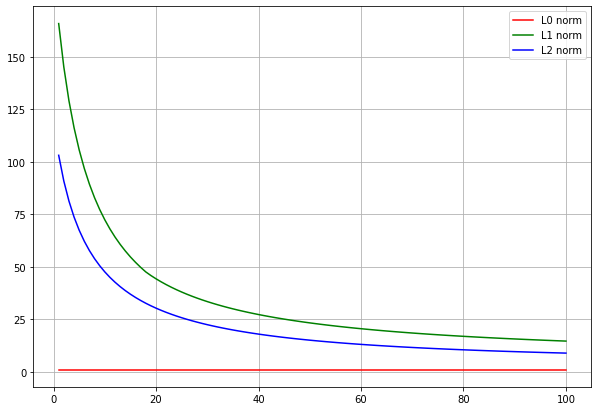

In [27]:
from sklearn.linear_model import Ridge

X6 = make_instances (-5,5,50)
Y6 = list(make_labels(Xp, f, 200))
X6_train, X_test, y6_train, y_test = train_test_split(X6, Y6, test_size=0.5)
poly = PolynomialFeatures(5)
designMatrix6 = poly.fit_transform(X6_train)
I = eye(designMatrix_train.shape[1])

plt.figure(figsize=[10,7])
plt.grid()

l0 = []
l1 = [] 
l2 = []

for l in range(1, 101) :
    #w = linalg.inv(designMatrix_train.T.dot(designMatrix_train)+ l*I).dot(designMatrix_train.T).dot(y_train)    
    rng = Ridge(alpha = l,fit_intercept=False )
    rng.fit(designMatrix6, y6_train)

    w6 = rng.coef_
    l0.append(nonzeroes(w6))
    l1.append(sum(abs(w6)))
    l2.append(sqrt(w6.dot(w6.T)[0]))
    

plt.plot(range(1,101), l0, 'r' , label="L0 norm")
plt.plot(range(1,101), l1, 'g' , label="L1 norm")
plt.plot(range(1,101), l2, 'b' , label="L2 norm")

    
plt.legend(loc="best")    



### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

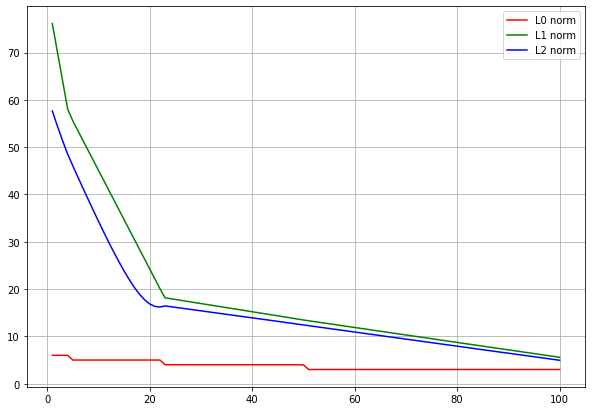

In [36]:
from sklearn.linear_model import Lasso

Xp = make_instances (-5,5,50)
Yp = list(make_labels(Xp, f, 200))
X_train, X_test, y_train, y_test = train_test_split(Xp, Yp, test_size=0.5)
poly = PolynomialFeatures(5)
designMatrix_train = poly.fit_transform(X_train)

plt.figure(figsize=[10,7])
plt.grid()

l0 = []
l1 = [] 
l2 = []

for l in range(1, 101) :
    #w = linalg.inv(designMatrix_train.T.dot(designMatrix_train)+ l*I).dot(designMatrix_train.T).dot(y_train)    
    clf = Lasso(alpha = l, fit_intercept=False)
    clf.fit(designMatrix_train, y_train)
    w = clf.coef_
    
    l0.append(nonzeroes(w))
    l1.append(sum(abs(w)))
    l2.append(sqrt(w.T.dot(w)))
    
    
    
plt.plot(range(1,101), l0, 'r' , label="L0 norm")
plt.plot(range(1,101), l1, 'g' , label="L1 norm")
plt.plot(range(1,101), l2, 'b' , label="L2 norm")
    
plt.legend(loc="best")  

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [29]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T


# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

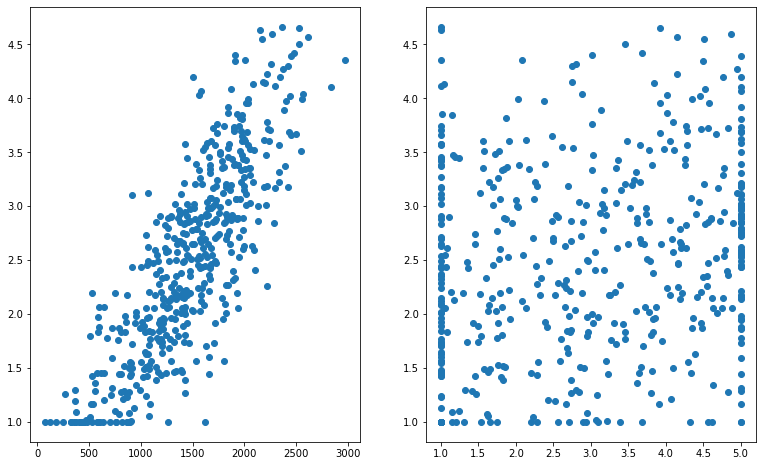

In [30]:
plt.figure(figsize=[13,8])
plt.subplot(1, 2, 1)
plt.scatter(exam_score, grades_y)
plt.subplot(1, 2, 2)
plt.scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [31]:
rng = Ridge(alpha = 0.01)
rng.fit(grades_X, grades_y)


print(rng.intercept_ , rng.coef_)

0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XY = np.c_[grades_X, grades_y]
grades_fixed = scaler.fit_transform(XY)
grades_X_fixed = grades_fixed[:,:2] 
grades_y_fixed = grades_fixed[:,2]

rng2 = Ridge(0.01)
rng2.fit(grades_X_fixed, grades_y_fixed)


print(rng2.intercept_ , rng2.coef_)


8.625513311328875e-17 [0.81630375 0.15167761]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [33]:
grades_X_fixed_colinear = np.hstack([grades_X_fixed, grades_X_fixed[:,-1:]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [34]:
rng = Ridge(alpha = 0.01)
rng.fit(grades_X_fixed_colinear, grades_y_fixed)
print(rng.intercept_, rng.coef_)

8.625597096332916e-17 [0.81630364 0.07583957 0.07583957]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [35]:
w1_rng1 = []
w2_rng1 = []
w1_rng2 = []
w2_rng2 = []
w3_rng1 = []
w3_rng2 = []

for i in range(10):
    grades_X_train, grades_X_test, grades_y_train, grades_y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5, train_size = 0.5)
    
    rng1 = Ridge(alpha = 0.01)
    rng1.fit(grades_X_train, grades_y_train)
    rng2 = Ridge(alpha = 1000)
    rng2.fit(grades_X_train, grades_y_train)
    print ("rng1: ", rng1.coef_)
    print ("rng2: ", rng2.coef_)
    
    w1_rng1.append(rng1.coef_[0])
    w1_rng2.append(rng2.coef_[1])
    w2_rng1.append(rng1.coef_[0])
    w2_rng2.append(rng2.coef_[1])
    w3_rng1.append(rng1.coef_[2])
    w3_rng2.append(rng2.coef_[2])
 

print()
print("rng1 :")
print(f"w1: {np.std(w1_rng1)}; w2: {np.std(w2_rng1)}; w3: {np.std(w3_rng1)}")

print("rng2 :")
print(f"w1: {np.std(w1_rng2)}; w2: {np.std(w2_rng2)}; w3: {np.std(w3_rng2)}")


    
    
    
    
    
    

rng1:  [0.79385128 0.06504303 0.06504303]
rng2:  [0.16436364 0.03812874 0.03812874]
rng1:  [0.80739011 0.0761075  0.0761075 ]
rng2:  [0.15992321 0.02415424 0.02415424]
rng1:  [0.814158   0.07673386 0.07673386]
rng2:  [0.16128257 0.02717137 0.02717137]
rng1:  [0.83265053 0.07483515 0.07483515]
rng2:  [0.16579999 0.03405283 0.03405283]
rng1:  [0.79735626 0.08013669 0.08013669]
rng2:  [0.15703356 0.02664742 0.02664742]
rng1:  [0.81845427 0.04525193 0.04525193]
rng2:  [0.17833349 0.03188297 0.03188297]
rng1:  [0.80086373 0.0614553  0.0614553 ]
rng2:  [0.15563723 0.022474   0.022474  ]
rng1:  [0.81216485 0.06648337 0.06648337]
rng2:  [0.16174675 0.03077003 0.03077003]
rng1:  [0.81501911 0.04444567 0.04444567]
rng2:  [0.16591703 0.01772788 0.01772788]
rng1:  [0.81925961 0.07443972 0.07443972]
rng2:  [0.16617211 0.03087282 0.03087282]

rng1 :
w1: 0.011026717248037098; w2: 0.011026717248037098; w3: 0.012169449476225147
rng2 :
w1: 0.005675240020786074; w2: 0.005675240020786074; w3: 0.0056752400

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.